#### Lake model continued

In the previous week you used the lake problem as a means of getting aquinted with the workbench. In this assignment we will continue with the lake problem, focussing explicitly on using it for open exploration. You can use the second part of [this tutorial](https://emaworkbench.readthedocs.io/en/latest/indepth_tutorial/open-exploration.html) for help.

**It is paramount that you are using the lake problem with 100 decision variables, rather than the one found on the website with the seperate anthropogenic release decision**

## Apply scenario discovery

1. Generate 10 policies and 1000 scenarios and evaluate them.
2. The experiments array contains the values for each of the 100 decision levers. This might easily mess up the analysis. Remove these columns from the experiment array. *hint: use `experiments.drop`*
3. Apply scenario discovery, focussing on the 10 percent of worst outcomes for reliability


In [37]:
import os
os.system("lake_problem_nesya.py")
from lakemodel_function import lake_problem
from ema_workbench import SequentialEvaluator
from ema_workbench import Model, RealParameter, TimeSeriesOutcome, ArrayOutcome, ScalarOutcome
import pandas as pd
from ema_workbench.analysis import cart
from ema_workbench.analysis import prim
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);
from ema_workbench.analysis import dimensional_stacking
import mpld3
import matplotlib.pyplot as plt

In [2]:
model = Model('LakeProblem', function=lake_problem)

model.uncertainties = [RealParameter('b', 0.1, 0.45), RealParameter('mean', 0.01, 0.05), 
                       RealParameter('stdev', 0.001, 0.005), RealParameter('delta', 0.93, 0.99), 
                       RealParameter('q', 2, 4.5)]
model.levers =  [RealParameter('l0', 0.0, 0.1),RealParameter('l36', 0.0, 0.1),RealParameter('l72', 0.0, 0.1),
                 RealParameter('l1', 0.0, 0.1),RealParameter('l37', 0.0, 0.1),RealParameter('l73', 0.0, 0.1),
                 RealParameter('l2', 0.0, 0.1),RealParameter('l38', 0.0, 0.1),RealParameter('l74', 0.0, 0.1),
                 RealParameter('l3', 0.0, 0.1),RealParameter('l39', 0.0, 0.1),RealParameter('l75', 0.0, 0.1),
                 RealParameter('l4', 0.0, 0.1),RealParameter('l40', 0.0, 0.1),RealParameter('l76', 0.0, 0.1),
                       RealParameter('l5', 0.0, 0.1),RealParameter('l41', 0.0, 0.1),RealParameter('l77', 0.0, 0.1),
                       RealParameter('l6', 0.0, 0.1),RealParameter('l42', 0.0, 0.1),RealParameter('l78', 0.0, 0.1),
                       RealParameter('l7', 0.0, 0.1),RealParameter('l43', 0.0, 0.1),RealParameter('l79', 0.0, 0.1),
                       RealParameter('l8', 0.0, 0.1),RealParameter('l44', 0.0, 0.1),RealParameter('l80', 0.0, 0.1),
                       RealParameter('l9', 0.0, 0.1),RealParameter('l45', 0.0, 0.1),RealParameter('l81', 0.0, 0.1),
                       RealParameter('l10', 0.0, 0.1),RealParameter('l46', 0.0, 0.1),RealParameter('l82', 0.0, 0.1),
                       RealParameter('l11', 0.0, 0.1),RealParameter('l47', 0.0, 0.1),RealParameter('l83', 0.0, 0.1),
                       RealParameter('l12', 0.0, 0.1),RealParameter('l48', 0.0, 0.1),RealParameter('l84', 0.0, 0.1),
                       RealParameter('l13', 0.0, 0.1),RealParameter('l49', 0.0, 0.1),RealParameter('l85', 0.0, 0.1),
                       RealParameter('l14', 0.0, 0.1),RealParameter('l50', 0.0, 0.1),RealParameter('l86', 0.0, 0.1),
                       RealParameter('l15', 0.0, 0.1),RealParameter('l51', 0.0, 0.1),RealParameter('l87', 0.0, 0.1),
                       RealParameter('l16', 0.0, 0.1),RealParameter('l52', 0.0, 0.1),RealParameter('l88', 0.0, 0.1),
                       RealParameter('l17', 0.0, 0.1),RealParameter('l53', 0.0, 0.1),RealParameter('l89', 0.0, 0.1),
                       RealParameter('l18', 0.0, 0.1),RealParameter('l54', 0.0, 0.1),RealParameter('l90', 0.0, 0.1),
                       RealParameter('l19', 0.0, 0.1),RealParameter('l55', 0.0, 0.1),RealParameter('l91', 0.0, 0.1),
                       RealParameter('l20', 0.0, 0.1),RealParameter('l56', 0.0, 0.1),RealParameter('l92', 0.0, 0.1),
                       RealParameter('l21', 0.0, 0.1),RealParameter('l57', 0.0, 0.1),RealParameter('l93', 0.0, 0.1),
                       RealParameter('l22', 0.0, 0.1),RealParameter('l58', 0.0, 0.1),RealParameter('l94', 0.0, 0.1),
                       RealParameter('l23', 0.0, 0.1),RealParameter('l59', 0.0, 0.1),RealParameter('l95', 0.0, 0.1),
                       RealParameter('l24', 0.0, 0.1),RealParameter('l60', 0.0, 0.1),RealParameter('l96', 0.0, 0.1),
                       RealParameter('l25', 0.0, 0.1),RealParameter('l61', 0.0, 0.1),RealParameter('l97', 0.0, 0.1),
                       RealParameter('l26', 0.0, 0.1),RealParameter('l62', 0.0, 0.1),RealParameter('l98', 0.0, 0.1),
                       RealParameter('l27', 0.0, 0.1),RealParameter('l63', 0.0, 0.1),RealParameter('l99', 0.0, 0.1),
                       RealParameter('l28', 0.0, 0.1),RealParameter('l64', 0.0, 0.1),
                       RealParameter('l29', 0.0, 0.1),RealParameter('l65', 0.0, 0.1),
                       RealParameter('l30', 0.0, 0.1),RealParameter('l66', 0.0, 0.1),
                       RealParameter('l31', 0.0, 0.1),RealParameter('l67', 0.0, 0.1),
                       RealParameter('l32', 0.0, 0.1),RealParameter('l68', 0.0, 0.1),
                       RealParameter('l33', 0.0, 0.1),RealParameter('l69', 0.0, 0.1),
                       RealParameter('l34', 0.0, 0.1),RealParameter('l70', 0.0, 0.1),
                       RealParameter('l35', 0.0, 0.1),RealParameter('l71', 0.0, 0.1)] 

model.outcomes = [ScalarOutcome('max_P'), ScalarOutcome('utility'), ScalarOutcome('inertia'), ScalarOutcome('reliability')]

In [3]:
with SequentialEvaluator(model) as evaluator:
    experiments, outcomes = evaluator.perform_experiments(scenarios=1000, policies=10)

[MainProcess/INFO] performing 1000 scenarios * 10 policies * 1 model(s) = 10000 experiments
[MainProcess/INFO] performing experiments sequentially
[MainProcess/INFO] 1000 cases completed
[MainProcess/INFO] 2000 cases completed
[MainProcess/INFO] 3000 cases completed
[MainProcess/INFO] 4000 cases completed
[MainProcess/INFO] 5000 cases completed
[MainProcess/INFO] 6000 cases completed
[MainProcess/INFO] 7000 cases completed
[MainProcess/INFO] 8000 cases completed
[MainProcess/INFO] 9000 cases completed
[MainProcess/INFO] 10000 cases completed
[MainProcess/INFO] experiments finished


In [4]:
experiments

,b,delta,mean,q,stdev,l0,l1,l10,l11,l12,...,l93,l94,l95,l96,l97,l98,l99,scenario,policy,model
0,0.147064,0.959969,0.034716,2.030691,0.004512,0.093322,0.022417,0.085462,0.012081,0.038164,...,0.074056,0.019222,0.061298,0.054305,0.049929,0.059046,0.040069,0,0,LakeProblem
1,0.134911,0.957759,0.013857,3.410347,0.003788,0.093322,0.022417,0.085462,0.012081,0.038164,...,0.074056,0.019222,0.061298,0.054305,0.049929,0.059046,0.040069,1,0,LakeProblem
2,0.233396,0.950577,0.044185,3.790974,0.004620,0.093322,0.022417,0.085462,0.012081,0.038164,...,0.074056,0.019222,0.061298,0.054305,0.049929,0.059046,0.040069,2,0,LakeProblem
3,0.130676,0.949519,0.036160,2.724984,0.002136,0.093322,0.022417,0.085462,0.012081,0.038164,...,0.074056,0.019222,0.061298,0.054305,0.049929,0.059046,0.040069,3,0,LakeProblem
4,0.145613,0.931703,0.027193,3.165805,0.003982,0.093322,0.022417,0.085462,0.012081,0.038164,...,0.074056,0.019222,0.061298,0.054305,0.049929,0.059046,0.040069,4,0,LakeProblem
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.203876,0.955690,0.011090,2.815317,0.003936,0.065701,0.039941,0.044766,0.090204,0.070530,...,0.082694,0.042856,0.004199,0.098120,0.027070,0.064106,0.098555,995,9,LakeProblem
9996,0.348010,0.954009,0.031707,2.760941,0.004502,0.065701,0.039941,0.044766,0.090204,0.070530,...,0.082694,0.042856,0.004199,0.098120,0.027070,0.064106,0.098555,996,9,LakeProblem
9997,0.351139,0.957834,0.046265,4.063687,0.003273,0.065701,0.039941,0.044766,0.090204,0.070530,...,0.082694,0.042856,0.004199,0.098120,0.027070,0.064106,0.098555,997,9,LakeProblem
9998,0.212923,0.978212,0.013371,4.069044,0.002352,0.065701,0.039941,0.044766,0.090204,0.070530,...,0.082694,0.042856,0.004199,0.098120,0.027070,0.064106,0.098555,998,9,LakeProblem


In [62]:
rel=pd.DataFrame(outcomes['reliability'])
rel=rel.sort_values(by=0)
rel=rel.rename(columns={0:'Reliability'})
rel=rel.reset_index(drop=True)
rel.iloc[1000]

Reliability    0.05
Name: 1000, dtype: float64

It is identified that the highest reliability value of the worst 10% scenarios is 0.05. Therefore, we select only datapoints which has reliability <0.05 for scenario discovery.

In [63]:
x = experiments.iloc[:, 0:4]
y = outcomes['reliability']<0.05

In [64]:
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha = 0.05)
box = prim_alg.find_box()

[MainProcess/INFO] 10000 points remaining, containing 828 cases of interest
[MainProcess/INFO] mean: 0.8568627450980392, mass: 0.051, coverage: 0.5277777777777778, density: 0.8568627450980392 restricted_dimensions: 3


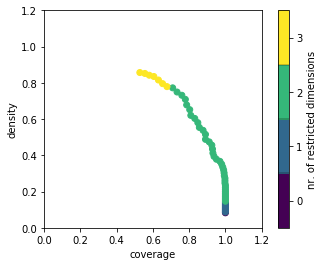

In [65]:
box.show_tradeoff()
plt.show()

coverage    0.847826
density     0.580165
id                40
mass           0.121
mean        0.580165
res_dim            2
Name: 40, dtype: object

     box 40                                           
        min       max                        qp values
q  2.001720  2.805719  [-1.0, 1.4342544209980518e-190]
b  0.100182  0.236459   [-1.0, 6.834051055503968e-142]



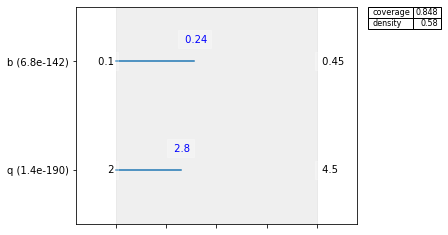

In [70]:
box.inspect(40)
box.inspect(40, style='graph')
plt.show()

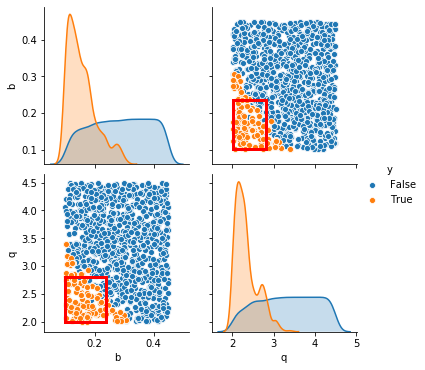

In [71]:
box.show_pairs_scatter(40)
plt.show()

## Visualize the results using Dimensional Stacking
Take the classification of outcomes as used in step 3 of scenario discovery, and instead visualize the results using dimensional stacking. How do these results compare to the insights from scenario discovery?

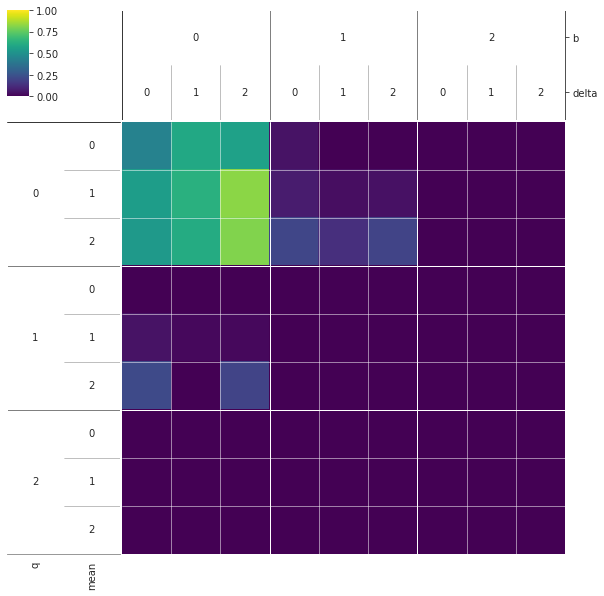

In [73]:
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()

We can see from this visual that if b and q are low, while delta is high, we have a high concentration of cases where the reliability is poor (below or equal to 0.05). The mean and stdev have some limited additional influence. 